# Load the dataset
There are a total of 4 datasets in **.csv** format.  
1. `users.csv` contains user demographic like age, nationality, and short bio.
2. `posts.csv` contains posts with unique post_id.
3. `comments.csv` contains list of comments with corresponding post_id and user_id, as well as timestamp for each comment.
4. `likes.csv` contains a like entry for each unique post_id and corresponding timestamps, and users who gave the live.

In [1]:
# load basic and essential libraries
import pandas as pd
import numpy as np
# dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# define file paths
path_comments = "/content/drive/MyDrive/social_media_analysis/comments.csv"
path_likes = "/content/drive/MyDrive/social_media_analysis/likes.csv"
path_users = "/content/drive/MyDrive/social_media_analysis/users.csv"
path_posts = "/content/drive/MyDrive/social_media_analysis/posts.csv"

In [4]:
# mount google drive
df_users =  pd.read_csv(path_users)
df_posts = pd.read_csv(path_posts)
df_comments = pd.read_csv(path_comments)
df_likes = pd.read_csv(path_likes)

In [5]:
# exploring each data
print('User\'s Info')
print(df_users.info())
print('\n')
print('Posts Info')
print(df_posts.info())
print('\n')
print('Comments Info')
print(df_comments.info())
print('\n')
print('Likes Info')
print(df_likes.info())

User's Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           81 non-null     int64 
 1   name         75 non-null     object
 2   age          81 non-null     int64 
 3   bio          52 non-null     object
 4   nationality  71 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.3+ KB
None


Posts Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       40 non-null     int64 
 1   user_id  40 non-null     int64 
 2   caption  40 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB
None


Comments Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

# Preliminary EDA

## Exploring Users dataset

In [6]:
# missing data
# There are null values in this dataset, missing names, missing bio, and missing nationality
total = df_users.isnull().sum().sort_values(ascending=False)
percent = (df_users.isnull().sum()/df_users.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

             Total   Percent
bio             29  0.358025
nationality     10  0.123457
name             6  0.074074
id               0  0.000000
age              0  0.000000


In [21]:
# check for duplicates

if len(set(df_users['id'])) == len(df_users['id']):
    print("success, no duplicates")
else:
    print("duplicate found")

success, no duplicates


In [23]:
# check for duplicate names
tmp  = set()
dups = set(x for x in df_users['name'] if (x in tmp or tmp.add(x)))
print(list(dups))

[nan, 'Liam Kim', 'Daniel Lee', 'Olivia Han', 'Lucas Choi', 'Emily Park', 'Mia Lee', 'Sofia Han']


In [30]:
df_users.groupby(['name']).agg(
    name_count = ('name', 'count')
).sort_values( by='name_count', ascending = False).head(10)

,name_count
name,
Sofia Han,3
Mia Lee,2
Daniel Lee,2
Emily Park,2
Liam Kim,2
Lucas Choi,2
Olivia Han,2
Mia Jung,1
Mia Clark,1


In [9]:
df_users['age'].describe()

count    81.000000
mean     29.222222
std       2.055480
min      25.000000
25%      28.000000
50%      29.000000
75%      31.000000
max      34.000000
Name: age, dtype: float64

In [14]:
count_age = df_users.groupby(['age']).size().to_frame()
print(count_age)

      0
age    
25    1
26    5
27   13
28   14
29   13
30   14
31    5
32   12
33    3
34    1


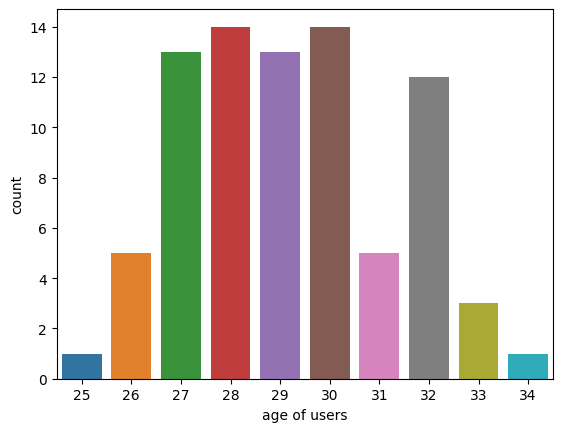

In [16]:
ax = sns.barplot(data=count_age, x=count_age.index, y=0)
ax.set(xlabel='age of users', ylabel='count')
plt.show()

              0
nationality    
AU            6
CA            5
CN            1
DE            1
ES            1
FR            2
GB            6
IT            2
JP            1
KR           35
MX            2
SE            1
US            8


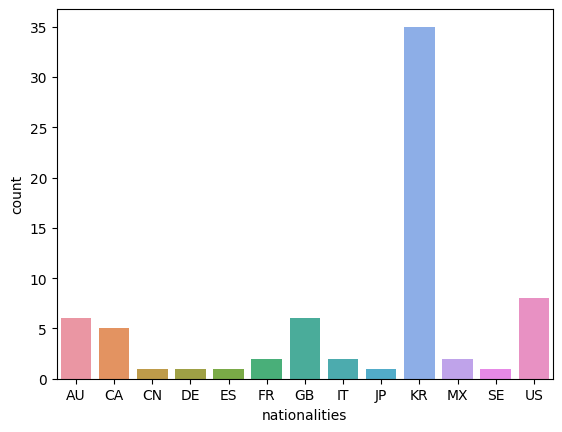

In [17]:
count_nationality = df_users.groupby(['nationality']).size().to_frame()
print(count_nationality)
ax = sns.barplot(data=count_nationality, x=count_nationality.index, y=0)
ax.set(xlabel='nationalities', ylabel='count')
plt.show()

## Exploring Post dataset

In [33]:
df_posts.head()

,id,user_id,caption
0,1,101,Enjoying a beautiful day at the beach with fri...
1,2,102,Exploring the breathtaking landscapes of a nat...
2,3,103,Cooking up a storm in the kitchen today. Tryin...
3,4,104,Embarking on a solo journey to discover myself...
4,5,105,Celebrating a major milestone today! It took d...


In [44]:
df_posts.describe()[]

,id,user_id
count,40.0,40.0


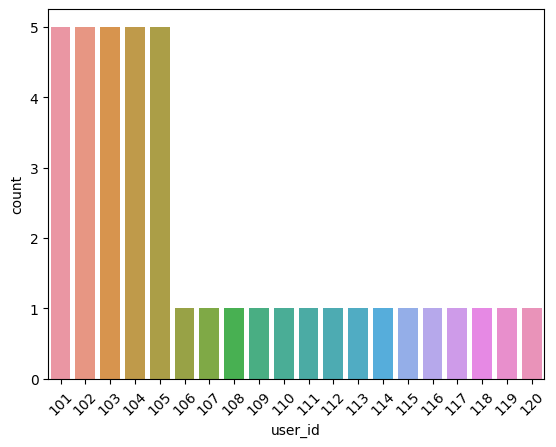

In [52]:
user_post_count = df_posts.groupby(['user_id']).agg(
    post_count = ('user_id', 'count')
).sort_values( by='post_count', ascending = False)
ax = sns.barplot(data=user_post_count, x=user_post_count.index, y='post_count')
ax.set(xlabel='user_id', ylabel='count')
plt.xticks(rotation=45)
plt.show()

In [53]:
# These are the top posters (the first users)
user_post_count.head(7)

,post_count
user_id,
101,5
103,5
104,5
105,5
102,5
113,1
119,1


## Exploring Comments dataset

In [66]:
df_comments.head()

,user_id,post_id,comment,time
0,101,1,Great post!,2023-05-02 00:15:30
1,102,1,I completely disagree with your point.,2023-05-02 01:35:45
2,103,1,Nice work!,2023-05-02 02:55:59
3,104,2,This is amazing!,2023-05-02 04:16:14
4,105,2,I'm not convinced.,2023-05-02 05:36:29


In [181]:
df_comments.info()
# time is in string format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  67 non-null     int64 
 1   post_id  67 non-null     int64 
 2   comment  67 non-null     object
 3   time     67 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


In [182]:
# convert `time` to datetime format
df_comments['time'] = df_comments['time'].astype('datetime64[ns]')
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  67 non-null     int64         
 1   post_id  67 non-null     int64         
 2   comment  67 non-null     object        
 3   time     67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.2+ KB


In [58]:
df_comments.head()

,user_id,post_id,comment,time
0,101,1,Great post!,2023-05-02 00:15:30
1,102,1,I completely disagree with your point.,2023-05-02 01:35:45
2,103,1,Nice work!,2023-05-02 02:55:59
3,104,2,This is amazing!,2023-05-02 04:16:14
4,105,2,I'm not convinced.,2023-05-02 05:36:29


In [69]:
df_comments_ = df_comments.set_index('time')

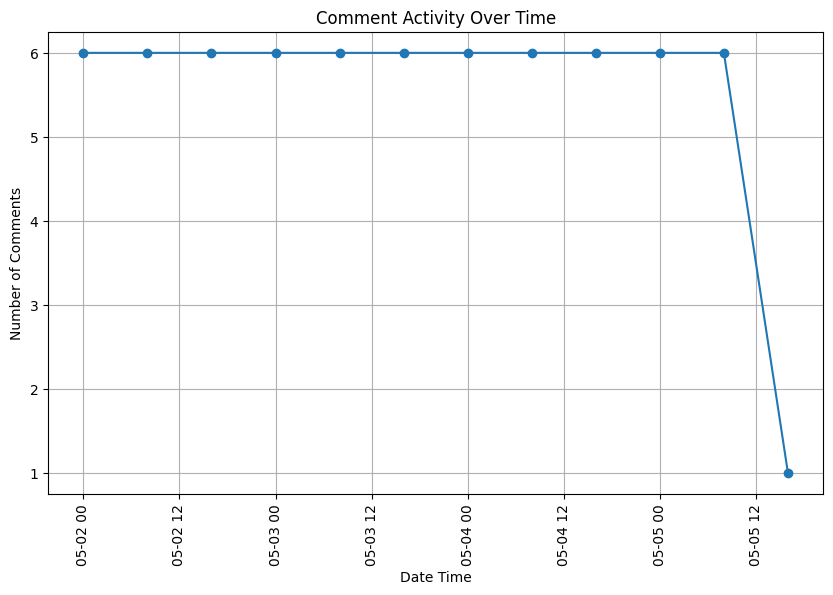

In [108]:
comment_counts = df_comments_['post_id'].resample('8H').size()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(comment_counts.index, comment_counts.values, marker='o')
plt.xlabel('Date Time')
plt.ylabel('Number of Comments')
plt.title('Comment Activity Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [119]:
# Who's user_id comments a lot?
df_comments_.groupby(['user_id']).agg(
    comment_count_by_user = ('user_id', 'count')
).sort_values( by='comment_count_by_user', ascending = False)

# results show there is no user that has multiple comments, e.g. like engaging to post by commenting 

,comment_count_by_user
user_id,
101,1
151,1
137,1
138,1
139,1
...,...
129,1
130,1
131,1


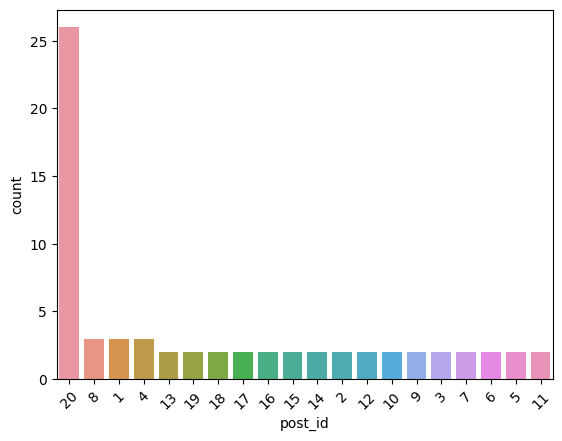

In [131]:
# which post_id has the highest comment count? (i.e. has the highest engagement via comments)
count_of_comments_per_post = df_comments_.groupby(['post_id']).agg(
    comment_count_by_post = ('post_id', 'count')
).sort_values( by='comment_count_by_post', ascending = False)

ax = sns.barplot(data=count_of_comments_per_post.reset_index(), 
                 x=count_of_comments_per_post.reset_index().post_id, 
                 y='comment_count_by_post',
                 order = count_of_comments_per_post
                 .reset_index()
                 .sort_values('comment_count_by_post', ascending=False)
                 .post_id)
ax.set(xlabel='post_id', ylabel='count')
plt.xticks(rotation=45)
plt.show()

In [124]:
# post_id = 20 is the most engaged via comments (total of 26 comments)
count_of_comments_per_post.head()

,comment_count_by_post
post_id,
20,26
4,3
8,3
1,3
5,2


In [283]:
# What does the post with the highest comment and or likes, tells us?
print(df_posts[df_posts['id']==20]['caption'].values)
print(df_posts[df_posts['id']==20]['user_id'])

["Soaking up the sun and embracing the joys of summer. It's a season of fun, laughter, and carefree moments. Let's make memories that will warm our hearts all year round. #summerdays #sunshine #memories #carefree"]
19    105
Name: user_id, dtype: int64


Post is about summer, and having fun while making merories.  
It was posted by user_id = **105**

In [284]:
df_users[df_users['id']==105]

,id,name,age,bio,nationality
5,105,Jessica Miller,29,Enjoys painting and attending art exhibitions.,US


## Exploring Likes dataset

In [132]:
df_likes.head()

,user_id,post_id,time
0,101,1,2023-05-01 08:15:23
1,102,1,2023-05-02 14:36:47
2,103,1,2023-05-03 10:20:15
3,104,1,2023-05-04 19:45:59
4,105,1,2023-05-05 12:10:30


In [134]:
df_likes.info()
# time is in string format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  269 non-null    int64 
 1   post_id  269 non-null    int64 
 2   time     269 non-null    object
dtypes: int64(2), object(1)
memory usage: 6.4+ KB


In [135]:
# convert `time` to datetime format
df_likes['time'] = df_likes['time'].astype('datetime64[ns]')
df_likes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  269 non-null    int64         
 1   post_id  269 non-null    int64         
 2   time     269 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.4 KB


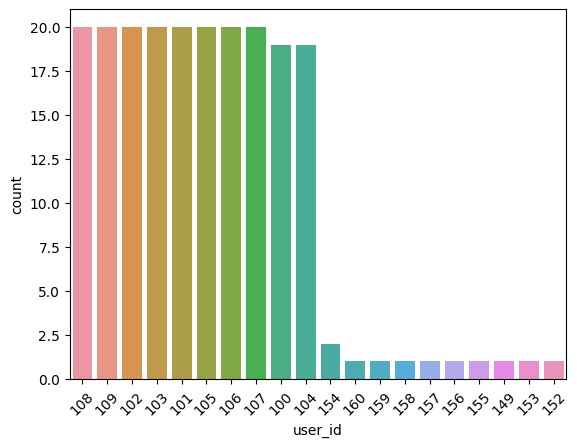

In [141]:
# Who's user engages via likes a lot?
count_of_likes_made_by_user = df_likes.groupby(['user_id']).agg(
    like_count_by_user = ('user_id', 'count')
).sort_values( by='like_count_by_user', ascending = False)

# slice data to visualize top 20 users only
df_user_likes_count = count_of_likes_made_by_user.head(20)

ax = sns.barplot(data=df_user_likes_count.reset_index(), 
                 x=df_user_likes_count.reset_index().user_id, 
                 y='like_count_by_user',
                 order = df_user_likes_count
                 .reset_index()
                 .sort_values('like_count_by_user', ascending=False)
                 .user_id)
ax.set(xlabel='user_id', ylabel='count')
plt.xticks(rotation=45)
plt.show()

# at least 10 users have given more than 15+ likes

In [147]:
# Which posts garnered the most likes?
df_likes.groupby(['post_id']).agg(
    like_count_per_post = ('post_id', 'count')
).sort_values( by='like_count_per_post', ascending = False)

# it seems that no post is leading based on likes, all has equal number of like (6), except for post_id = 45

,like_count_per_post
post_id,
1,6
24,6
26,6
27,6
28,6
29,6
30,6
31,6
32,6


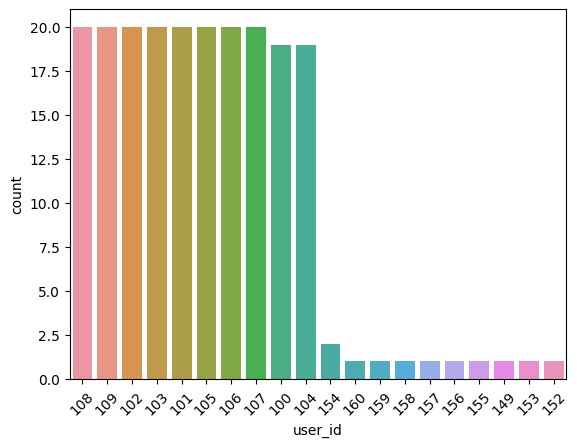

In [142]:
# Which post received the highest likes?
count_of_likes_per_post = df_likes.groupby(['post_id']).agg(
    like_count_per_post = ('post_id', 'count')
).sort_values( by='like_count_per_post', ascending = False)

# slice data to visualize top 20 users only
df_user_likes_count = count_of_likes_made_by_user.head(20)

ax = sns.barplot(data=df_user_likes_count.reset_index(), 
                 x=df_user_likes_count.reset_index().user_id, 
                 y='like_count_by_user',
                 order = df_user_likes_count
                 .reset_index()
                 .sort_values('like_count_by_user', ascending=False)
                 .user_id)
ax.set(xlabel='user_id', ylabel='count')
plt.xticks(rotation=45)
plt.show()

# at least 10 users have given more than 15+ likes

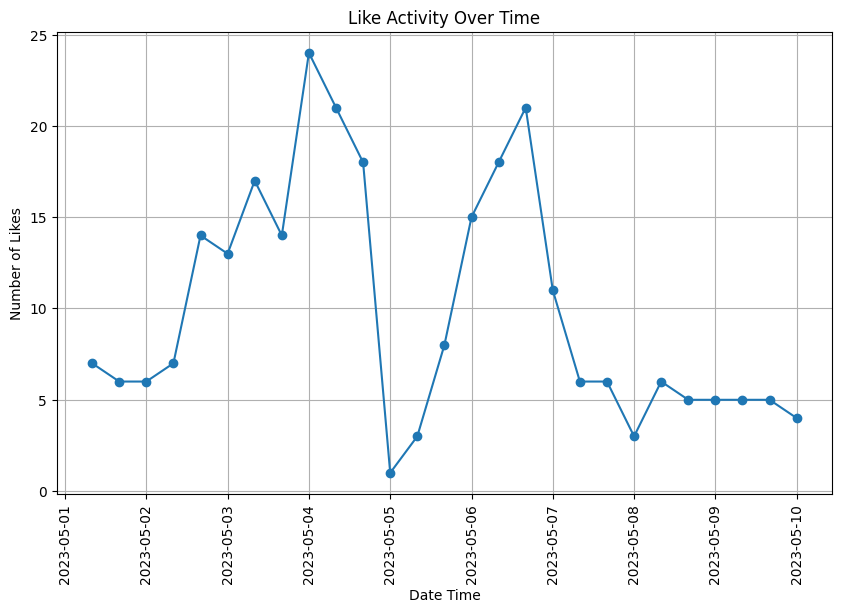

In [149]:
# Create a time series exploring the number of likes happened over time

df_likes_ = df_likes.set_index('time')

likes_count = df_likes_['post_id'].resample('8H').size()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(likes_count.index, likes_count.values, marker='o')
plt.xlabel('Date Time')
plt.ylabel('Number of Likes')
plt.title('Like Activity Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Data Cleaning

In [7]:
# missing data
# There are null values in this dataset, missing names, missing bio, and missing nationality
total = df_users.isnull().sum().sort_values(ascending=False)
percent = (df_users.isnull().sum()/df_users.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

             Total   Percent
bio             29  0.358025
nationality     10  0.123457
name             6  0.074074
id               0  0.000000
age              0  0.000000


Steps:  
1. remove `name` feature, as this will not be relevant to the analysis
2. impute missing entry in `bio` as **no_bio_available**
3. impute missing entry in `nationality` as **nationality_unknown**

# NLP Process
Goals:  
1. Create cluster persona based on bio, identify if there is a commonality between age groups, and nationality
2. Conduct setiment analysis on comments
3. What does the post with the highest comment and or likes, tells us

## TF-IDF: Explore most common terms used in the Users.bio

In [8]:
# TfidfVectorizer from the scikit learn library to process text
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# Define parameters and store in a variable
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .9, min_df = .01)

In [20]:
df_users.head()

,id,name,age,bio,nationality
0,100,John Smith,25,Loves exploring new cuisines and trying out ne...,US
1,101,Emily Johnson,30,Passionate about photography and traveling.,CA
2,102,Michael Williams,28,Enjoys outdoor activities and playing sports.,GB
3,103,Jennifer Brown,32,Loves reading books and writing poetry.,US
4,104,David Davis,27,NaN,AU


In [26]:
df_users_bio = df_users.loc[df_users['bio'].notnull()]

In [27]:
df_users_bio['bio'].to_list()

['Loves exploring new cuisines and trying out new recipes.',
 'Passionate about photography and traveling.',
 'Enjoys outdoor activities and playing sports.',
 'Loves reading books and writing poetry.',
 'Enjoys painting and attending art exhibitions.',
 'Adventurous spirit with a love for hiking and nature.',
 'Enjoys playing musical instruments and composing music.',
 'Enjoys watching movies and trying out new restaurants.',
 'Passionate about fashion and exploring personal style.',
 'Enjoys gardening and growing own vegetables.',
 'Loves playing video games and watching anime.',
 'Passionate about yoga and mindfulness practices.',
 'Enjoys playing chess and solving puzzles.',
 'Loves photography and capturing special moments.',
 'Enjoys playing guitar and writing songs.',
 'Loves exploring new hiking trails and being in nature.',
 'Enjoys knitting and creating handmade crafts.',
 'Passionate about football and supporting local teams.',
 'Enjoys watching documentaries and learning ab

In [55]:
# Create a corpus of bios that are not null
df_users_bio = df_users.loc[df_users['bio'].notnull()]
corpus_bio = df_users_bio['bio'].to_list()

In [50]:
# Apply TfidfVectorizer to our corpus. X is a sparse matrix which holds the location of all non-zero values.
X = vectorizer.fit_transform(corpus_bio)

# Extract words aka ‘feature names’ from vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dense matrix to convert into a list, and finally a dataframe.
dense = X.todense()
denselist = dense.tolist()
df_bio = pd.DataFrame(denselist, columns=feature_names)
df_bio.head()

,activities,adventurous,anime,art,attending,baking,board,books,capturing,chess,...,trails,traveling,trying,variety,vegetables,video,volunteering,watching,writing,yoga
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.337609,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.660684,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.533514,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.497402,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.441129,0.0
4,0.000000,0.0,0.0,0.468604,0.495483,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [46]:
list_of_users = df_users_bio['id'].to_list()
# user_id
list_append = ["user_id_" + str(user_id) for user_id in list_of_users]
print(list_append)

['user_id_100', 'user_id_101', 'user_id_102', 'user_id_103', 'user_id_105', 'user_id_107', 'user_id_108', 'user_id_110', 'user_id_111', 'user_id_113', 'user_id_114', 'user_id_116', 'user_id_117', 'user_id_119', 'user_id_120', 'user_id_122', 'user_id_123', 'user_id_125', 'user_id_127', 'user_id_128', 'user_id_130', 'user_id_131', 'user_id_133', 'user_id_134', 'user_id_135', 'user_id_137', 'user_id_138', 'user_id_140', 'user_id_142', 'user_id_143', 'user_id_144', 'user_id_145', 'user_id_147', 'user_id_149', 'user_id_150', 'user_id_152', 'user_id_154', 'user_id_156', 'user_id_157', 'user_id_159', 'user_id_160', 'user_id_162', 'user_id_164', 'user_id_165', 'user_id_167', 'user_id_169', 'user_id_170', 'user_id_172', 'user_id_174', 'user_id_176', 'user_id_178', 'user_id_179']


In [53]:
# Identify the meaninful words based on bio
data = df_bio.transpose()
data.columns = list_of_users
# Find the top 10 words said by each user
top_dict = {}
for c in range(len(list_of_users)):
    top = data.iloc[:,c].sort_values(ascending=False).head(10)
    top_dict[data.columns[c]]= list(zip(top.index, top.values))
# Print the top 5 words said by each user
for user_id, top_words in top_dict.items():
    print(user_id)
    print(', '.join([word for word, count in top_words[0:3]]))
    print('---')

100
new, cuisines, recipes
---
101
traveling, photography, passionate
---
102
activities, sports, outdoor
---
103
books, reading, poetry
---
105
attending, exhibitions, art
---
107
adventurous, love, spirit
---
108
musical, instruments, composing
---
110
movies, restaurants, watching
---
111
fashion, personal, style
---
113
vegetables, gardening, growing
---
114
anime, video, games
---
116
mindfulness, practices, yoga
---
117
puzzles, solving, chess
---
119
moments, special, capturing
---
120
guitar, songs, writing
---
122
trails, nature, hiking
---
123
crafts, knitting, handmade
---
125
supporting, local, football
---
127
learning, documentaries, history
---
128
concerts, discovering, going
---
130
mediums, experimenting, different
---
131
baking, dessert, recipes
---
133
national, parks, hiking
---
134
game, board, nights
---
135
volunteering, giving, community
---
137
short, stories, poetry
---
138
immersing, cultures, different
---
140
variety, plants, gardening
---
142
practicing,

## Topic Modeling: Users.bio dataset
source: https://www.toptal.com/python/python-social-media-analysis

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# Non-negative matrix factorization (NMF) mode for topic modeling, commonly used for social media analysis
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [66]:
# Create a corpus for analysis
# -- Create a corpus of bios that are not null
# 
# df_users_bio = df_users.loc[df_users['bio'].notnull()]
# corpus_bio = df_users_bio['bio'].to_list()
corpus = " ".join(corpus_bio) #compress into a single list

count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts = count_vect.fit_transform([corpus])

feature_names = count_vect.get_feature_names_out()
# TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .9, min_df = .01)
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)


In [162]:
number_of_topics = 10

# using LDA
# model = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df_users_bio['bio']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names_out()

In [118]:
model = NMF(n_components=number_of_topics, random_state=42, l1_ratio=.5)

In [92]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


In [143]:
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,new,2.4,about,2.2,enjoys,3.3,music,1.1,exploring,1.2,art,1.2,games,1.0,photography,1.2,writing,1.1,hiking,1.1
1,trying,2.0,passionate,2.1,playing,0.5,musical,1.0,about,1.1,painting,1.2,playing,0.9,special,1.0,poetry,1.0,nature,0.9
2,out,2.0,yoga,0.8,gardening,0.4,instruments,1.0,passionate,1.1,attending,1.0,watching,0.9,moments,1.0,books,0.8,exploring,0.9
3,recipes,1.8,traveling,0.7,growing,0.4,composing,1.0,fashion,1.1,exhibitions,1.0,video,0.8,capturing,1.0,reading,0.8,loves,0.6
4,loves,1.6,fitness,0.5,variety,0.2,playing,1.0,style,1.1,enjoys,0.4,anime,0.8,loves,0.4,loves,0.3,in,0.4
5,dessert,1.4,practicing,0.5,plants,0.2,loves,0.5,personal,1.1,loves,0.2,loves,0.6,traveling,0.2,enjoys,0.2,being,0.3
6,baking,1.4,photography,0.5,of,0.2,to,0.1,cuisines,0.0,different,0.2,board,0.1,enjoys,0.2,short,0.2,trails,0.3
7,cuisines,0.3,to,0.3,vegetables,0.2,discovering,0.1,parks,0.0,with,0.2,game,0.1,immersing,0.0,stories,0.2,new,0.3
8,restaurants,0.2,giving,0.3,own,0.2,concerts,0.1,national,0.0,mediums,0.2,nights,0.1,cultures,0.0,guitar,0.0,with,0.2
9,movies,0.2,volunteering,0.3,watching,0.2,going,0.1,new,0.0,experimenting,0.2,hosting,0.1,different,0.0,songs,0.0,spirit,0.2


In [132]:
def create_topics(model, feature_names, no_top_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        topic_list_ = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_list.append(topic_list_)
    return topic_list

In [133]:
create_topics(model, tf_feature_names, no_top_words)

[['new', 'trying', 'out', 'recipes', 'loves'],
 ['about', 'passionate', 'yoga', 'traveling', 'fitness'],
 ['enjoys', 'playing', 'gardening', 'growing', 'variety'],
 ['music', 'musical', 'instruments', 'composing', 'playing'],
 ['exploring', 'about', 'passionate', 'fashion', 'style'],
 ['art', 'painting', 'attending', 'exhibitions', 'enjoys'],
 ['games', 'playing', 'watching', 'video', 'anime'],
 ['photography', 'special', 'moments', 'capturing', 'loves'],
 ['writing', 'poetry', 'books', 'reading', 'loves'],
 ['hiking', 'nature', 'exploring', 'loves', 'in']]

In [144]:
topic_list = create_topics(model, tf_feature_names, no_top_words)

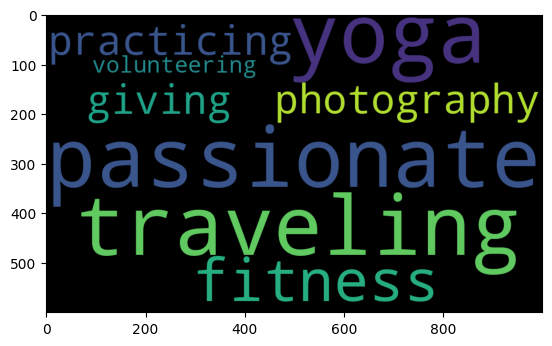

In [145]:
wc = WordCloud(background_color="black",
               width=1000,
               height=600,
              )
y = " ".join(topic_list[1])
wc.generate(y)
plt.imshow(wc)

## Topic Modeling: Posts dataset

### Data cleaning (text pre-processing)

In [172]:
# set nltk corpus words
words = set(nltk.corpus.words.words())
# define stopwords, from nltk
stop_words = stopwords.words('english')

df_posts_ = df_posts.copy()

In [173]:
# Making conversion
df_posts_['text_lower'] = df_posts_['caption'].str.lower()
df_posts_['text_no_num'] = df_posts_['text_lower'].str.replace(r'\d+', '')
df_posts_['text_no_punc'] = df_posts_['text_no_num'].str.replace(r'[^\w\s]+', '')
df_posts_['text_no_stopwords'] = [" ".join([word for word in i.split() if word not in stop_words]) for i in df_posts_['text_no_punc']]

<ipython-input-173-29ad4e094bd1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_posts_['text_no_num'] = df_posts_['text_lower'].str.replace(r'\d+', '')
<ipython-input-173-29ad4e094bd1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_posts_['text_no_punc'] = df_posts_['text_no_num'].str.replace(r'[^\w\s]+', '')


In [174]:
df_posts_.head()

,id,user_id,caption,text_lower,text_no_num,text_no_punc,text_no_stopwords
0,1,101,Enjoying a beautiful day at the beach with fri...,enjoying a beautiful day at the beach with fri...,enjoying a beautiful day at the beach with fri...,enjoying a beautiful day at the beach with fri...,enjoying beautiful day beach friends sun shini...
1,2,102,Exploring the breathtaking landscapes of a nat...,exploring the breathtaking landscapes of a nat...,exploring the breathtaking landscapes of a nat...,exploring the breathtaking landscapes of a nat...,exploring breathtaking landscapes national par...
2,3,103,Cooking up a storm in the kitchen today. Tryin...,cooking up a storm in the kitchen today. tryin...,cooking up a storm in the kitchen today. tryin...,cooking up a storm in the kitchen today trying...,cooking storm kitchen today trying new recipe ...
3,4,104,Embarking on a solo journey to discover myself...,embarking on a solo journey to discover myself...,embarking on a solo journey to discover myself...,embarking on a solo journey to discover myself...,embarking solo journey discover embrace new ex...
4,5,105,Celebrating a major milestone today! It took d...,celebrating a major milestone today! it took d...,celebrating a major milestone today! it took d...,celebrating a major milestone today it took de...,celebrating major milestone today took dedicat...


### Apply vectorizer and feed to NMF model

In [175]:
# the vectorizer object will be used to transform text to vector form
count_vect = CountVectorizer(stop_words=stop_words,
                             lowercase=True,
                             max_df=0.9,
                             token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
x_counts = count_vect.fit_transform(df_posts_['text_no_stopwords']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = count_vect.get_feature_names_out()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'t", "'ve"] not in stop_words.
  warnings.warn(


In [176]:
model = NMF(n_components=number_of_topics, random_state=42, l1_ratio=.5)

In [177]:
model.fit(x_counts)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,kindness,3.6,adventure,2.5,diversity,1.6,success,1.5,flavors,1.0,breathtaking,1.0,step,0.9,laughter,1.0,painting,0.9,journey,0.9
1,joys,2.4,road,1.3,unity,1.1,perseverance,1.1,people,0.8,sunset,0.9,workout,0.8,friends,0.9,emotions,0.9,chapter,0.9
2,warm,2.4,unknown,1.3,us,1.1,milestone,0.8,cooking,0.7,natures,0.7,remember,0.6,support,0.6,create,0.5,growth,0.9
3,make,2.3,new,1.2,celebrate,1.1,hard,0.7,food,0.6,awe,0.6,body,0.6,friendship,0.6,today,0.5,memories,0.5
4,lets,2.3,exploration,1.1,embracing,0.6,work,0.7,together,0.6,beauty,0.6,goals,0.5,grateful,0.6,truly,0.4,embracing,0.5
5,moments,2.2,embarking,0.9,make,0.6,goals,0.6,brings,0.6,never,0.6,progress,0.5,beach,0.6,creativity,0.4,reflection,0.4
6,spread,2.0,journey,0.9,lets,0.6,way,0.4,world,0.6,fails,0.5,taking,0.4,memories,0.5,sanctuary,0.4,reflecting,0.4
7,wherever,1.8,leaving,0.7,beauty,0.6,achievement,0.4,new,0.4,orange,0.5,healthier,0.4,sun,0.4,express,0.4,downs,0.4
8,cherish,1.8,behind,0.7,world,0.5,dedication,0.4,recipe,0.4,hues,0.5,burn,0.4,sunshine,0.4,playground,0.4,past,0.4
9,conversation,1.8,unfold,0.7,inclusion,0.5,challenges,0.4,taste,0.4,golden,0.5,fitnessjourney,0.4,moments,0.4,voice,0.4,next,0.4


## What does the post with the highest comment and or likes, tells us?
Based on the EDA above, it is post_id no.20 has the highest comments

## Topic Modeling: Comments dataset

### Data cleaning (text pre-processing)

In [183]:
df_comments_ = df_comments.copy()

In [186]:
# Making conversion
df_comments_['text_lower'] = df_comments_['comment'].str.lower()
df_comments_['text_no_num'] = df_comments_['text_lower'].str.replace(r'\d+', '')
df_comments_['text_no_punc'] = df_comments_['text_no_num'].str.replace(r'[^\w\s]+', '')
df_comments_['text_no_stopwords'] = [" ".join([word for word in i.split() if word not in stop_words]) for i in df_comments_['text_no_punc']]

<ipython-input-186-9b856c3d2ddf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_comments_['text_no_num'] = df_comments_['text_lower'].str.replace(r'\d+', '')
<ipython-input-186-9b856c3d2ddf>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_comments_['text_no_punc'] = df_comments_['text_no_num'].str.replace(r'[^\w\s]+', '')


In [207]:
# Count len of texts for comments
df_comments_['text_count_full'] = df_comments_['comment'].apply(lambda x: len(x.split()))
df_comments_['text_count'] = df_comments_['text_no_stopwords'].apply(lambda x: len(x.split()))

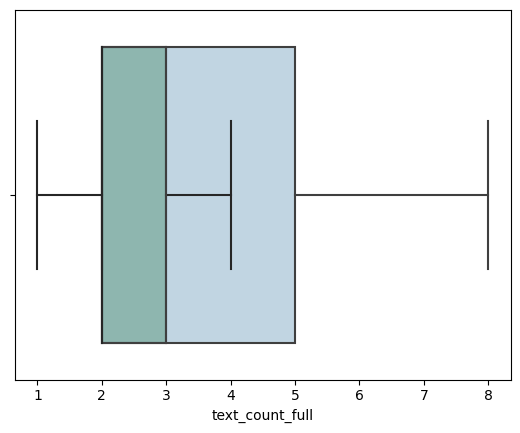

In [217]:
# visualize text count of raw vs cleaned texts
sns.boxplot(x=df_comments_['text_count'], color='green')
ax = sns.boxplot(x=df_comments_['text_count_full'])
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

## Sentiment Analysis: Comments dataset
Text comments are minimal < 8words, doing topic modeling is not useful.
Let's do sentiment analysis instead

In [218]:
from textblob import TextBlob

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [233]:
df_comments_['Subjectivity'] = df_comments_['text_no_punc'].apply(subjectivity)
df_comments_['Polarity'] = df_comments_['text_no_punc'].apply(polarity)

In [240]:
df_comments_['Subjectivity'] = df_comments_['comment'].apply(subjectivity)
df_comments_['Polarity'] = df_comments_['comment'].apply(polarity)

In [259]:
def getAnalysis(score):
    if score < 0.5:
        return 'Negative'
    elif score > 0.5:
        return 'Positive'
    else:
        return 'Neutral'

df_comments_['Sent_Analysis'] = df_comments_['Polarity'].apply(getAnalysis)



In [266]:
df_comments_['Sent_Analysis'].value_counts()

Negative    39
Positive    18
Neutral     10
Name: Sent_Analysis, dtype: int64

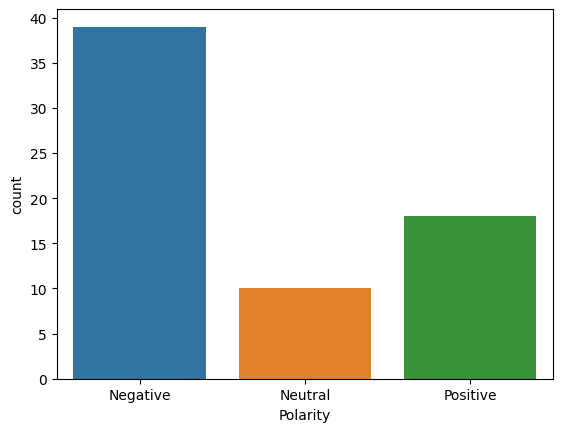

In [270]:
count_polarity = df_comments_.groupby(['Sent_Analysis']).size().to_frame()

ax = sns.barplot(data=count_polarity, x=count_polarity.index, y=0)
ax.set(xlabel='Polarity', ylabel='count')
plt.show()

In [251]:
df_comments_.filter(items=['comment', 'text_no_stopwords', 'Sent_Analysis'])

,comment,text_no_stopwords,Sent_Analysis
0,Great post!,great post,Positive
1,I completely disagree with your point.,completely disagree point,Negative
2,Nice work!,nice work,Positive
3,This is amazing!,amazing,Positive
4,I'm not convinced.,im convinced,Negative
...,...,...,...
62,I don't buy it.,dont buy,Negative
63,Well explained.,well explained,Negative
64,I have a different perspective.,different perspective,Negative
65,Impressive analysis.,impressive analysis,Positive
